IRIS FLOWER CLASSIFICATION

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data=pd.read_csv("C:/Users/DELL/Downloads/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

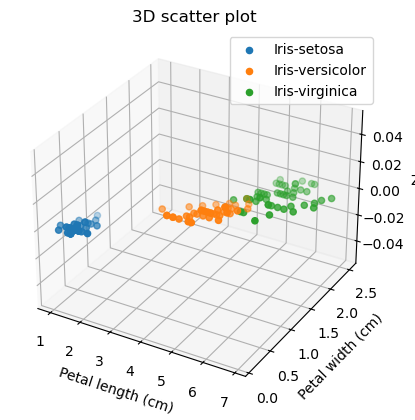

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for species in data['species'].unique():
    species_data = data[data['species'] == species]
    ax.scatter(species_data['petal_length'], species_data['petal_width'], np.zeros_like(species_data['petal_length']), label=species)

ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
ax.set_zlabel('Z')
plt.title('3D scatter plot')
plt.legend()
plt.show()


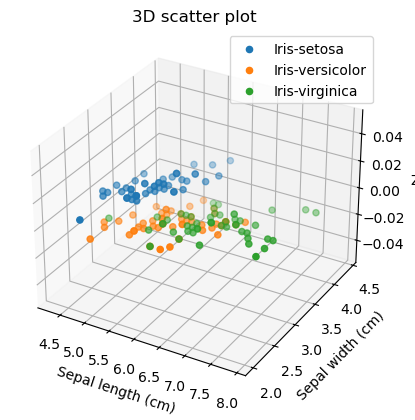

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for species in data['species'].unique():
    species_data = data[data['species'] == species]
    ax.scatter(species_data['sepal_length'], species_data['sepal_width'], np.zeros_like(species_data['sepal_length']), label=species)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Z')
plt.title('3D scatter plot')
plt.legend()
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

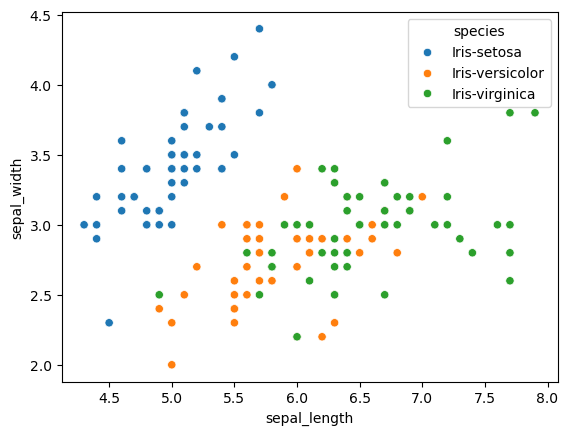

In [37]:
sns.scatterplot(data=data,x="sepal_length",y="sepal_width",hue="species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

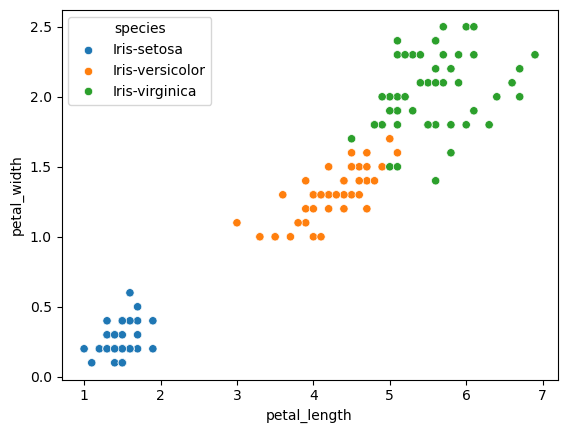

In [38]:
sns.scatterplot(data=data,x="petal_length",y="petal_width",hue="species")

Elbow Technique

In [51]:
import warnings
from sklearn.cluster import KMeans

k_rng = range(1, 10)
sse = []

warnings.simplefilter("ignore")

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

warnings.simplefilter("default")


In [52]:
sse

[550.6434666666669,
 86.40394533571003,
 31.42928566827698,
 20.25528278388278,
 14.084349656750572,
 11.162107880813144,
 9.463339431913118,
 8.33661191626409,
 7.598287267080746]

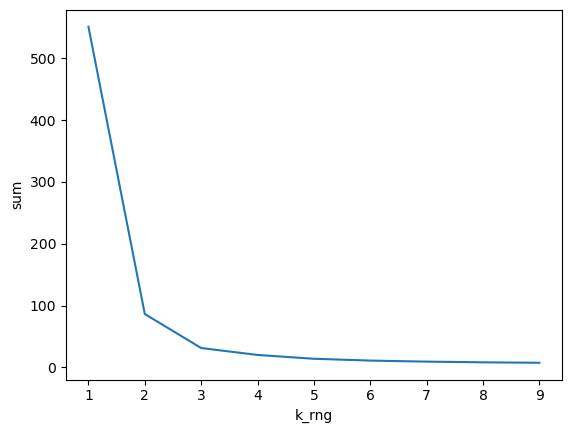

In [53]:
plt.xlabel('k_rng')
plt.ylabel("sum")
plt.plot(k_rng,sse)

In [55]:
#K mean Alogrithm
km=KMeans(n_clusters=3,random_state=0,)
y_predicted=km.fit_predict(data[['petal_length','petal_width']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
data['clusters']=y_predicted
data.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [66]:
from sklearn.metrics import confusion_matrix

# Assuming km is the KMeans model you fitted earlier
data['cluster'] = km.labels_

# Map cluster labels to species labels
cluster_labels = {i: species for i, species in enumerate(data['species'].unique())}

data['cluster'] = data['cluster'].map(cluster_labels)

cm = confusion_matrix(data['species'], data['cluster'])
cm


array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix

true_labels = data.species
predicted_labels = data.clusters

# Map cluster labels to species labels
cluster_labels = {i: species for i, species in enumerate(data['species'].unique())}

predicted_labels = [cluster_labels[i] for i in predicted_labels]

cm = confusion_matrix(true_labels, predicted_labels)


In [72]:
class_labels=['Setosa','Vesicolor','Virginica']

([<matplotlib.axis.YTick at 0x196ff08f440>,
 [Text(0, 0, 'Setosa'), Text(0, 1, 'Vesicolor'), Text(0, 2, 'Virginica')])

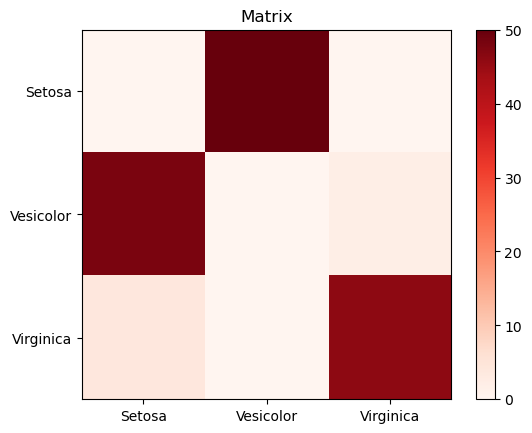

In [77]:
#plot
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Reds)
plt.title('Matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

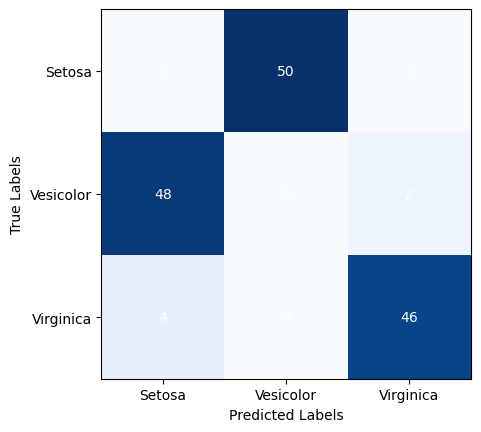

In [83]:
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)
plt.imshow(cm, cmap='Blues')
plt.show()